In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate,accuracy

In [6]:
path = untar_data(URLs.CALTECH_101)

In [9]:
path = Config.data_path()/'101_ObjectCategories'

In [10]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/pigeon'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/lamp'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/crocodile'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/pagoda'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/mandolin'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/ibis'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/barrel'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/mayfly'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/rooster'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/octopus'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/ant'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/elephant'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/windsor_chair'),
 PosixPath('/home/jupyter/.fastai/data/101_ObjectCategories/saxophone'),
 PosixPa

In [11]:
np.random.seed(2)

Use all the data as training with valid_pact

In [12]:
data = ImageDataBunch.from_folder(path,train='.',ds_tfms=get_transforms(),size=26,valid_pct=0.2).normalize(imagenet_stats)

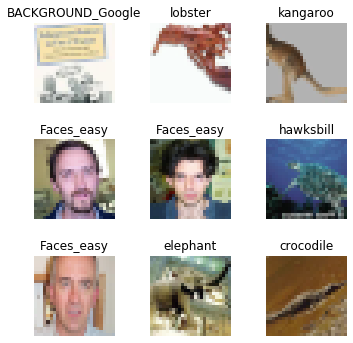

In [13]:
data.show_batch(rows=3,figsize=(5,5))

In [14]:
data.c

102

In [15]:
learn = cnn_learner(data,models.resnet50,metrics=accuracy)
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,4.174244,3.049580,0.359409,00:16
1,3.338144,2.699857,0.403720,00:14


In [16]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,3.131176,2.684515,0.404267,00:14
1,2.857062,2.329695,0.455142,00:14
2,2.588527,2.232904,0.472648,00:14


In [17]:
learn.save('stage-1')

## Results

In [18]:
interp = ClassificationInterpretation.from_learner(learn)

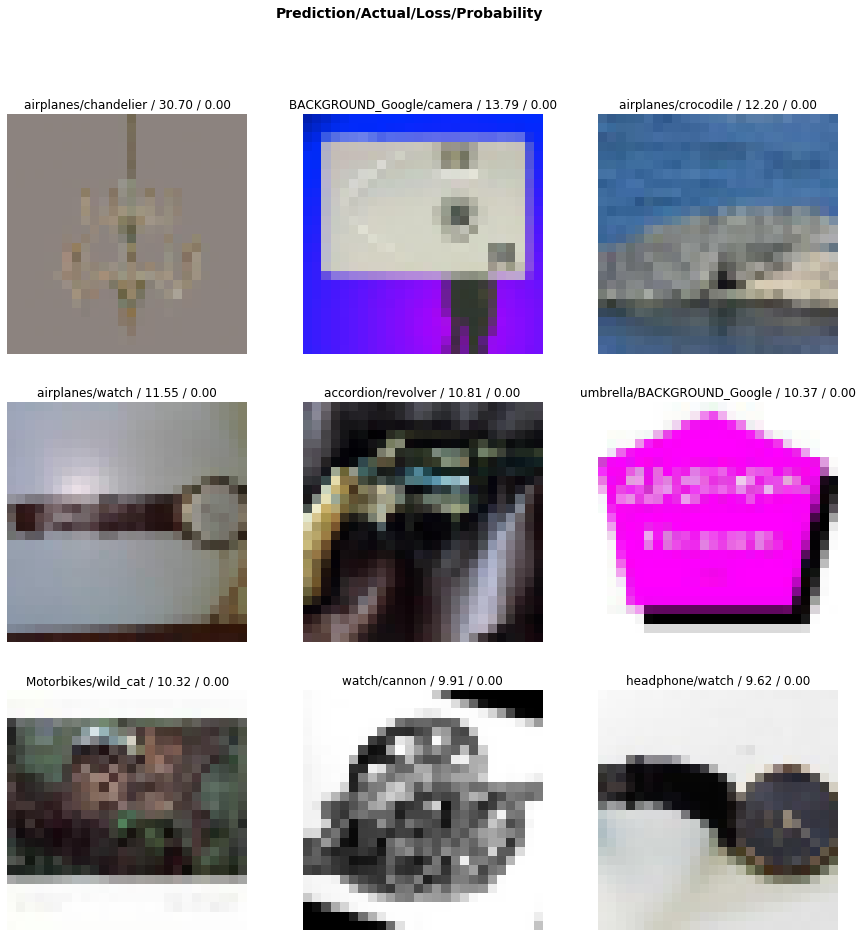

In [19]:
interp.plot_top_losses(9,figsize=(15,15))

In [20]:
learn.unfreeze()

In [21]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


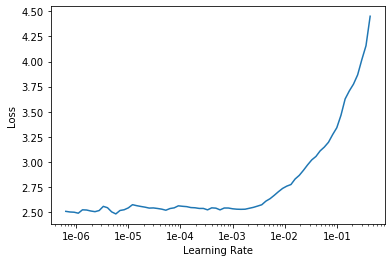

In [22]:
learn.recorder.plot()

In [23]:
learn.unfreeze()
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,2.433408,2.163205,0.487418,00:14
1,2.373042,2.105235,0.507659,00:15
2,2.330670,2.073312,0.505470,00:14


In [24]:
learn.save('stage-2')